In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import seaborn as sns

from tqdm import tqdm

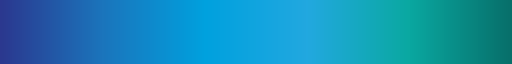

In [2]:
# COLOR SETTINGS
colors = ['#2B388F', '#1B75BC', '#00A1DE', '#22A8E0', '#0AA8A1', '#076F6A']
cmap = LinearSegmentedColormap.from_list('bluegreen', colors)
cmap

In [3]:
df1 = pd.read_csv('./data/kospi-market/kospi_market_1995_2024.csv', index_col=['티커', 'Unnamed: 1'], low_memory=False)
df2 = pd.read_csv('./data/kosdaq-market/kosdaq_market_1995_2024.csv', index_col=['티커', 'Unnamed: 1'], low_memory=False)

In [4]:
df1['market'] = 'kospi'
df2['market'] = 'kosdaq'

In [5]:
mkt = pd.concat([df1, df2])

In [8]:
close = mkt.close.unstack().T

In [13]:
ret = close.pct_change(fill_method=None)

In [17]:
ret_q99 = ret.quantile(q=0.99, axis=1)
ret_med = ret.median(axis=1)
ret_q01 = ret.quantile(q=0.01, axis=1)

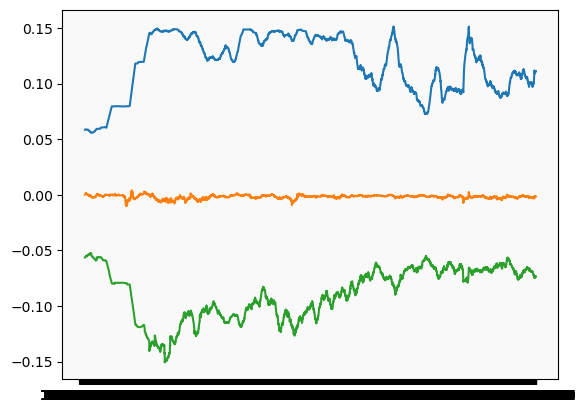

In [27]:
fig, ax = plt.subplots()

ax.plot(ret_q99.rolling(window=90).mean())
ax.plot(ret_med.rolling(window=90).mean())
ax.plot(ret_q01.rolling(window=90).mean())

ax.set_facecolor('#F9F9F9')
ax.set_xmargin(0)
plt.show()